In [9]:
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
zip_file_path = r'C:\Users\HP\Desktop\Credit Card Fraud Detection\archive.zip'

# Open the ZIP file and read the CSV
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open('creditcard.csv') as f:  # Replace with the actual CSV file name if different
        df = pd.read_csv(f)
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:

df['Class'].value_counts()

df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:


from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

new_df = new_df.sample(frac = 1 , random_state = 1)
new_df

train, test , val = new_df[:240000], new_df[240000 : 262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

train_np, test_np, val_np = train.to_numpy(), test.to_numpy(),val.to_numpy()
train_np.shape,test_np.shape,val_np.shape

x_train , y_train = train_np[:, :-1], train_np[:, -1]
x_test , y_test = test_np[:, :-1], test_np[:, -1]
x_val , y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape , y_train.shape,x_test.shape , y_test.shape ,x_val.shape , y_val.shape


((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     22771
       Fraud       0.83      0.56      0.67        36

    accuracy                           1.00     22807
   macro avg       0.92      0.78      0.83     22807
weighted avg       1.00      1.00      1.00     22807

Confusion Matrix:
[[22767     4]
 [   16    20]]


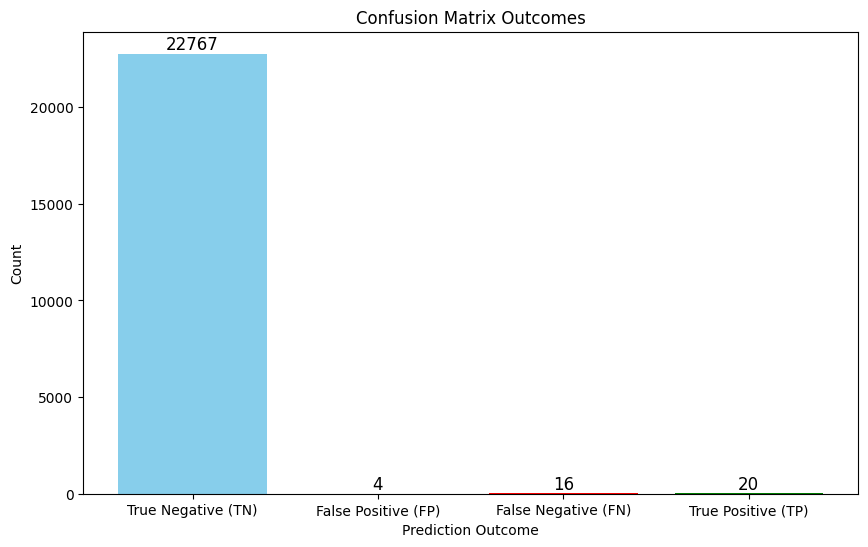

In [24]:


from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_train,y_train)

from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not fraud', 'Fraud']))
conf_matrix = confusion_matrix(y_val, logistic_model.predict(x_val))
print("Confusion Matrix:")
print(conf_matrix)
TN, FP = conf_matrix[0][0], conf_matrix[0][1]
FN, TP = conf_matrix[1][0], conf_matrix[1][1]

# Create labels and values for the bar graph
labels = ['True Negative (TN)', 'False Positive (FP)', 
          'False Negative (FN)', 'True Positive (TP)']
values = [TN, FP, FN, TP]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'red', 'green'])

# Display the individual counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above each bar
             f'{height}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Confusion Matrix Outcomes')
plt.show()




In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

# Update the checkpoint file path to end with .keras
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [14]:
shallow_nn.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, callbacks=checkpoint)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9715 - loss: 0.1559 - val_accuracy: 0.9991 - val_loss: 0.0089
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0095
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0088
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0077
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0091
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0081
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9989 - val_loss: 0.0094
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0

In [27]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.64      0.78      0.70        36

    accuracy                           1.00     22807
   macro avg       0.82      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[22755    16]
 [    8    28]]


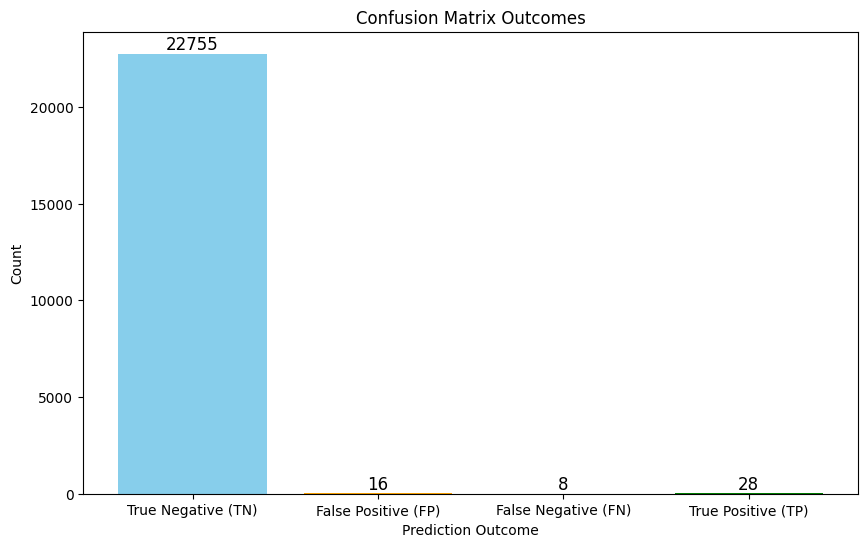

In [28]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))
conf_matrix = confusion_matrix(y_val, neural_net_predictions(shallow_nn, x_val))
print("Confusion Matrix:")
print(conf_matrix)
TN, FP = conf_matrix[0][0], conf_matrix[0][1]
FN, TP = conf_matrix[1][0], conf_matrix[1][1]

# Create labels and values for the bar graph
labels = ['True Negative (TN)', 'False Positive (FP)', 
          'False Negative (FN)', 'True Positive (TP)']
values = [TN, FP, FN, TP]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'red', 'green'])

# Display the individual counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above each bar
             f'{height}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Confusion Matrix Outcomes')
plt.show()


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.67      0.67      0.67        36

    accuracy                           1.00     22807
   macro avg       0.83      0.83      0.83     22807
weighted avg       1.00      1.00      1.00     22807

Confusion Matrix:
[[22759    12]
 [   12    24]]


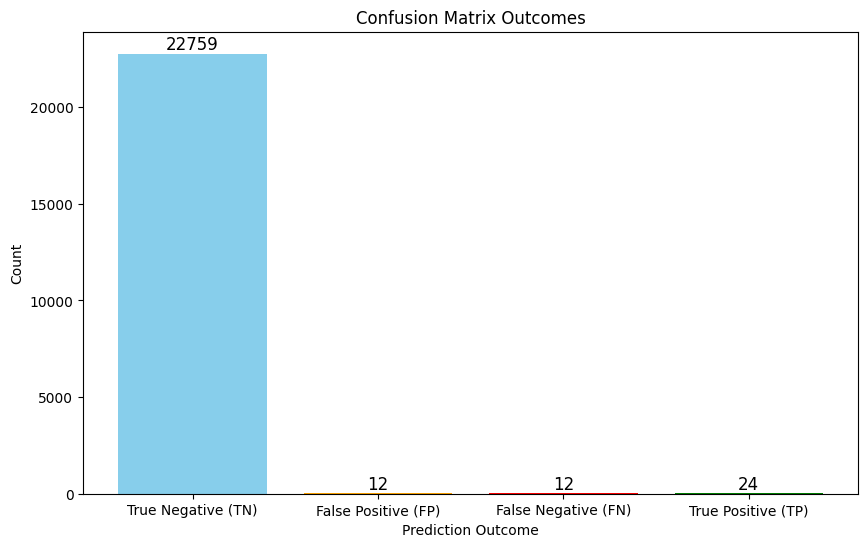

In [18]:
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))
conf_matrix = confusion_matrix(y_val, gbc.predict(x_val))
print("Confusion Matrix:")
print(conf_matrix)
TN, FP = conf_matrix[0][0], conf_matrix[0][1]
FN, TP = conf_matrix[1][0], conf_matrix[1][1]

# Create labels and values for the bar graph
labels = ['True Negative (TN)', 'False Positive (FP)', 
          'False Negative (FN)', 'True Positive (TP)']
values = [TN, FP, FN, TP]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'red', 'green'])

# Display the individual counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Position above each bar
             f'{height}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Confusion Matrix Outcomes')
plt.show()

In [29]:
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Step 2: Train the LinearSVC model with class weight balanced
svc = LinearSVC(class_weight='balanced', max_iter=10000)  # Increase max_iter if needed
svc.fit(X_resampled, y_resampled)

# Step 3: Make predictions on the validation set
decision_scores = svc.decision_function(x_val)  # Get decision function scores

# Step 4: Evaluate different thresholds
thresholds = [0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred_adjusted = (decision_scores >= threshold).astype(int)

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     22771
       Fraud       0.14      0.89      0.25        36

    accuracy                           0.99     22807
   macro avg       0.57      0.94      0.62     22807
weighted avg       1.00      0.99      0.99     22807

Confusion Matrix:
[[22581   190]
 [    4    32]]


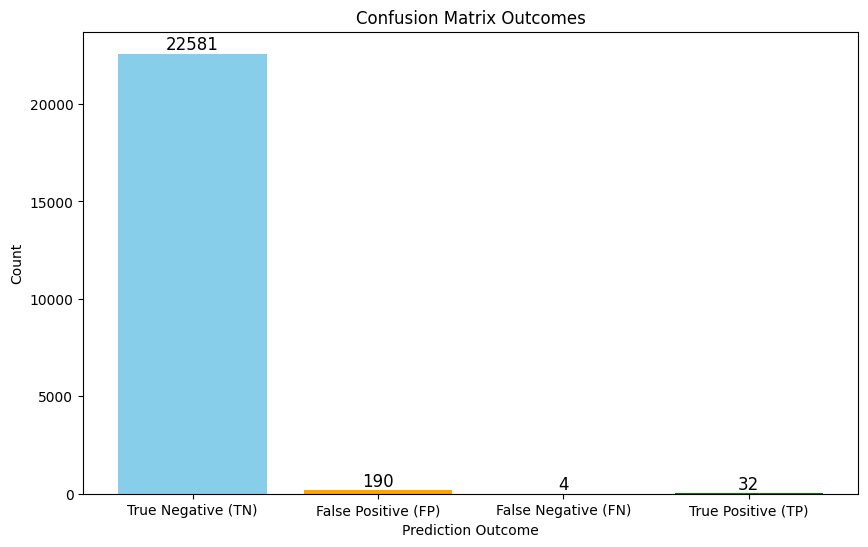

In [30]:
print("Classification Report:")
print(classification_report(y_val, y_pred_adjusted, target_names=['Not Fraud', 'Fraud']))
conf_matrix = confusion_matrix(y_val, y_pred_adjusted)
print("Confusion Matrix:")
print(conf_matrix)
TN, FP = conf_matrix[0][0], conf_matrix[0][1]
FN, TP = conf_matrix[1][0], conf_matrix[1][1]


labels = ['True Negative (TN)', 'False Positive (FP)', 
          'False Negative (FN)', 'True Positive (TP)']
values = [TN, FP, FN, TP]


plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'red', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  
             f'{height}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Confusion Matrix Outcomes')
plt.show()
